<a href="https://colab.research.google.com/github/dzubii/Assignments/blob/master/TensorFlow_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Your name:

<pre> David Zubicek</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### TensorFlow

Q1. When is a variable initialized? When is it destroyed?

A variable is initialized by calling the tf.global_variables_initializer() function. A variable is destroyed when the session ends.

Q2. What is the difference between a placeholder and a variable?

A TensorFlow variable can be initialized and modified. A placeholder does not require initialization. A placeholder allocates a block of memory.

Q3. How many times does reverse-mode autodiff need to traverse the graph in order to compute the gradients of the cost function with regards to 10 variables? What about forward-mode autodiff? And symbolic differentiation?

2 times. 6 times for forward-mode. 

Q4. Implement Logistic Regression with Mini-batch Gradient Descent using TensorFlow. Train it and evaluate it on the moons dataset (introduced in Chapter 5). Try adding all the bells and whistles:

- Define the graph within a logistic_regression() function that can be reused easily.

- Save checkpoints using a Saver at regular intervals during training, and save the final model at the end of training.

- Restore the last checkpoint upon startup if training was interrupted.

- Define the graph using name scopes so the graph looks good in TensorBoard.

- Add summaries to visualize the learning curves in TensorBoard.

- Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at the shape of the learning curve.

(1000, 2)
(1000,)
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


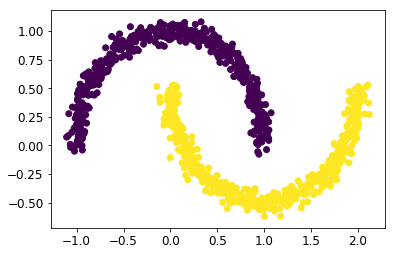

In [0]:
size = 1000
X_moons, y_moons = make_moons(size, noise=0.05, random_state=42)

print(X_moons.shape)
print(y_moons.shape)
print(X_moons)

X = X_moons[:,0]
Y = X_moons[:,1]
plt.scatter(X, Y, c=y_moons)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_moons, y_moons, test_size=0.2)

Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

n, m =  X_train.shape
X_ph = tf.placeholder(tf.float32, shape=(None, m), name="X")
Y_ph = tf.placeholder(tf.float32, shape=(None, 1), name="Y")
theta = tf.Variable(tf.random_uniform([m, 1], -1, 1), name="theta")

y_est = tf.matmul(X_ph, theta , name="estimation")

proba = tf.sigmoid(y_est)

loss = tf.losses.log_loss(Y_ph, proba)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

def random_batch(X_train, y_train, batch_size):
    """ this create a batch of X and Y of size "batch_size" """
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

def reset_graph(seed=42):
    """Simple function to clear tf"""
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0 	Loss: 0.5090386
[[ 0.94279623]
 [-0.20823918]
 [-0.7482585 ]]
Epoch: 100 	Loss: 0.25382397
[[ 0.94279623]
 [ 0.8824503 ]
 [-1.997832  ]]
Epoch: 200 	Loss: 0.24338877
[[ 0.94279623]
 [ 1.0071361 ]
 [-2.3922782 ]]
Epoch: 300 	Loss: 0.23995842
[[ 0.94279623]
 [ 1.0335313 ]
 [-2.6076574 ]]
Epoch: 400 	Loss: 0.23847374
[[ 0.94279623]
 [ 1.0523429 ]
 [-2.7496786 ]]
Epoch: 500 	Loss: 0.23764183
[[ 0.94279623]
 [ 1.058134  ]
 [-2.8433378 ]]
Epoch: 600 	Loss: 0.23715736
[[ 0.94279623]
 [ 1.059676  ]
 [-2.9046702 ]]
Epoch: 700 	Loss: 0.23722698
[[ 0.94279623]
 [ 1.0784224 ]
 [-2.9498918 ]]
Epoch: 800 	Loss: 0.23680192
[[ 0.94279623]
 [ 1.0693264 ]
 [-2.9850307 ]]
Epoch: 900 	Loss: 0.23683113
[[ 0.94279623]
 [ 1.0769717 ]
 [-3.0079572 ]]


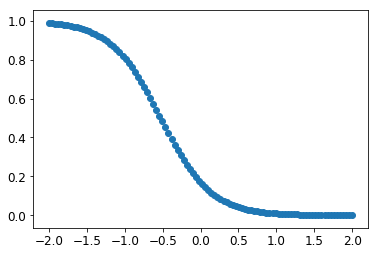

In [0]:
sess = tf.InteractiveSession()

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(n / batch_size))

sess.run(init)

for epoch in range(n_epochs):
    for batch_index in range(n_batches):
        X_batch, y_batch = random_batch(X_train, Y_train, batch_size)
        sess.run(training_op, feed_dict={X_ph: X_batch, Y_ph: y_batch})
    loss_val = loss.eval({X_ph: X_test, Y_ph: Y_test})
    if epoch % 100 == 0:
        print("Epoch:", epoch, "\tLoss:", loss_val)
        print(theta.eval())

        bias = np.zeros(100)
X1 = np.linspace(-2, 2, 100)
Y1 = -1.5*np.ones(100)
X_eval = np.c_[bias, Y1, X1]
y_proba_val = proba.eval(feed_dict={X_ph: X_eval})
plt.scatter(X1, y_proba_val)
plt.show()

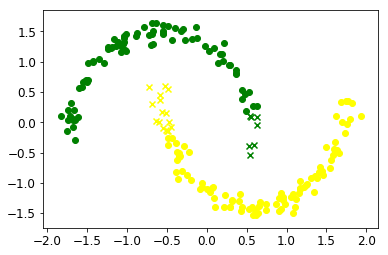

In [0]:
y_proba_val = proba.eval(feed_dict={X_ph: X_test})
y_proba_bool = (y_proba_val >= 0.5)

X = X_test[:,1]
Y = X_test[:,2]
comparator = (y_proba_bool == Y_test)
m = {True : "o", False : "x"}
comparator = np.vectorize(m.get)(comparator)
n = {0 : "green", 1 : "yellow"}
colors = np.vectorize(n.get)(Y_test)

for x, y, c, m in zip(X, Y, colors, comparator):
    plt.scatter(x, y, c=c[0], marker = m[0])    
plt.show()

Q5. Similar to the linear regression implementation in class, write a lasso regression implementation. Use the same dataset, and choose a value for the penalty $\alpha$:

Using a Saver at regular intervals during training, and save the final model at the end of training.

Restore the last checkpoint upon startup if training was interrupted.

Define the graph using name scopes so the graph looks good in TensorBoard.

Add summaries to visualize the learning curves in TensorBoard.

Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at the shape of the learning curve.

In [0]:
#Code here

In [0]:
#Code here

In [0]:
#Code here